In [19]:

from tkinter import *
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from tkinter.ttk import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk) 
from tkinter import messagebox 
import pygame
import os 


pygame 2.6.0 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [27]:
df['is_french'] = df['nationality'].str.contains('France')
df['is_french'].head()

0    False
1    False
2     True
3    False
4    False
Name: is_french, dtype: bool

In [26]:
df = pd.read_csv('fifa_players.csv')
df.head()

nb_french_players = df['is_french'].sum()
total_players = len(df)
proportion_french_players = nb_french_players / total_players
print(f'Nombre de joueurs français: {nb_french_players}')
print(f'Proportion de joueurs français: {proportion_french_players:.2f}')
bins = [0, 70, 80, 90, 100]

Nombre de joueurs français: 925
Proportion de joueurs français: 0.05


In [4]:
bins = [0, 70, 80, 90, 100]
labels = ['Under 70 kg', '70-80 kg', '80-90 kg', 'Over 90 kg']
df.loc[df['is_french'], 'weight_category'] = pd.cut(df['weight_kgs'], bins=bins, labels=labels, right=False)
french_players = df[df['is_french']]
print(french_players[['full_name','weight_kgs', 'weight_category']])
french_names = french_players['full_name'].tolist()
print(f"French names: {french_names}")
weight_category_counts = french_players['weight_category'].value_counts(sort=False)
print("Nombre de joueurs dans chaque catégorie de poids :")
print(weight_category_counts)
list_data = weight_category_counts.tolist()
print(list_data)

               full_name  weight_kgs weight_category
2             Paul Pogba        83.9        80-90 kg
6          Kylian Mbappé        73.0        70-80 kg
13     Antoine Griezmann        73.0        70-80 kg
35       Anthony Martial        76.2        70-80 kg
41           Nabil Fekir        74.8        70-80 kg
...                  ...         ...             ...
17900      Karim Benzema        81.2        80-90 kg
17909     Raphaël Varane        81.2        80-90 kg
17917      Samuel Umtiti        74.8        70-80 kg
17923        Hugo Lloris        82.1        80-90 kg
17929       N'Golo Kanté        72.1        70-80 kg

[925 rows x 3 columns]
French names: ['Paul Pogba', 'Kylian Mbappé', 'Antoine Griezmann', 'Anthony Martial', 'Nabil Fekir', 'Ousmane Dembélé', 'Adrien Rabiot', 'Kingsley Coman', 'Thomas Lemar', 'Clément Lenglet', 'Jérôme Roussillon', 'Benjamin Mendy', 'Alassane Plea', 'Abdoulaye Doucouré', 'Houssem Aouar', 'Tanguy NDombèlé Alvaro', 'Jérémy Mathieu', 'Josuha Gui

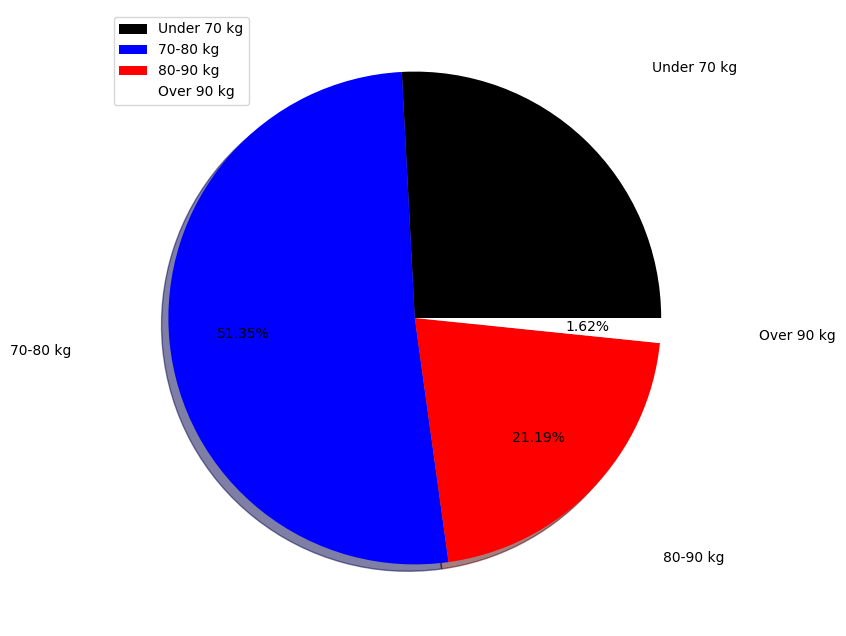

In [5]:
fig = plt.figure(figsize = (8, 8))
x = [list_data[0], list_data[1], list_data[2], list_data[3]]
plt.pie(x, labels = ['Under 70 kg', '70-80 kg', '80-90 kg', 'Over 90 kg'],
           colors = ['black', 'blue', 'red', 'white'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.legend()

In [21]:
def poids(poi):
    root2 = Tk()
    root2.geometry("1200x1200")
    graph = FigureCanvasTkAgg(poi, master= root2)
    graph.draw()
    canvas = graph.get_tk_widget()
    canvas.pack(fill=BOTH, expand=YES)
    pygame.mixer.init()
    pygame.mixer.music.load("zidane.mp3")
    pygame.mixer.music.play()
     
    

In [7]:
bins = [0, 30, 60, 90,100]
labels = ['Below 30', '30-60', '60-90', 'Above 90']
df.loc[df['is_french'], 'shots_category'] = pd.cut(df.loc[df['is_french'], 'long_shots'], bins=bins, labels=labels, right=False)
french_players =df[df['is_french']]
print(french_players[['full_name','long_shots', 'shots_category']])
shots_category_counts = french_players['shots_category'].value_counts(sort=False)
print("Nombre de shots par joueurs :")
print(shots_category_counts)
list_data2 = shots_category_counts.tolist()
print(list_data2)

               full_name  long_shots shots_category
2             Paul Pogba          82          60-90
6          Kylian Mbappé          78          60-90
13     Antoine Griezmann          82          60-90
35       Anthony Martial          80          60-90
41           Nabil Fekir          82          60-90
...                  ...         ...            ...
17900      Karim Benzema          76          60-90
17909     Raphaël Varane          53          30-60
17917      Samuel Umtiti          74          60-90
17923        Hugo Lloris          14       Below 30
17929       N'Golo Kanté          69          60-90

[925 rows x 3 columns]
Nombre de shots par joueurs :
shots_category
Below 30    206
30-60       422
60-90       297
Above 90      0
Name: count, dtype: int64
[206, 422, 297, 0]


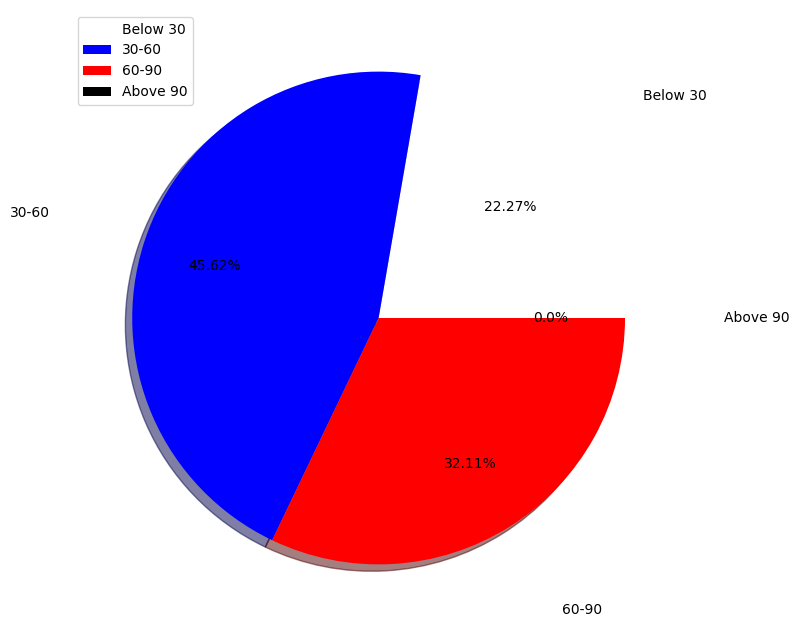

In [8]:
fig2 = plt.figure(figsize = (8, 8))
x = [list_data2[0], list_data2[1], list_data2[2], list_data2[3]]
plt.pie(x, labels = ['Below 30', '30-60', '60-90', 'Above 90'],
           colors = ['white', 'blue', 'red', 'black'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.legend()

In [18]:
def tirs(tir):
    root3 = Tk()
    root3.geometry("1200x1200")
    graph = FigureCanvasTkAgg(tir, master= root3)
    graph.draw()
    canvas = graph.get_tk_widget()
    canvas.pack(fill=BOTH, expand=YES)
    pygame.mixer.init()
    pygame.mixer.music.load("pavard.mp3")
    pygame.mixer.music.play()
    root3.mainloop()

In [29]:
search_name = 'Kylian Mbappé'
player_info = french_players[french_players['full_name']==search_name]
if not player_info.empty:
    print(f"Informations pour {search_name} :")
    print(player_info)
else:
    print(f"{search_name} n'est pas trouvé dans la liste des joueurs français.")

Informations pour Kylian Mbappé :
        name      full_name  birth_date  age  height_cm  weight_kgs positions  \
6  K. Mbappé  Kylian Mbappé  12/20/1998   20      152.4        73.0  RW,ST,RM   

  nationality  overall_rating  potential  ...  positioning  vision penalties  \
6      France              88         95  ...           88      82        70   

   composure  marking  standing_tackle sliding_tackle  is_french  \
6         86       34               34             32       True   

  weight_category  shots_category  
6        70-80 kg           60-90  

[1 rows x 54 columns]


In [10]:

def joueurs(search_name1,search_name2):
    player_info1 = french_players[french_players['full_name'] == search_name1]
    player_info2 = french_players[french_players['full_name'] == search_name2]
    
    if not player_info1.empty and not player_info2.empty:
        stats1 = player_info1[['full_name', 'height_cm', 'weight_kgs']].reset_index(drop=True)
        stats2 = player_info2[['full_name', 'height_cm', 'weight_kgs']].reset_index(drop=True)
        
        stats_diff = stats1[['height_cm', 'weight_kgs']] - stats2[['height_cm', 'weight_kgs']]
        stats_diff['full_name'] = 'Difference'
    
        comparison = pd.concat([stats1, stats2, stats_diff], axis=0).reset_index(drop=True)
        
        # Afficher la comparaison
        print(f"\nComparaison des TAILLES et POIDS pour {search_name1} et {search_name2} :")
        print(comparison)
        comparaison(comparison)
    else:
        if player_info1.empty:
            print(f"{search_name1} n'est pas trouvé dans la liste des joueurs français.")
            messagebox.showerror("Error", f"{search_name1} n'est pas trouvé dans la liste des joueurs français.")
        if player_info2.empty:
            print(f"{search_name2} n'est pas trouvé dans la liste des joueurs français.")
            messagebox.showerror("Error",f"{search_name2} n'est pas trouvé dans la liste des joueurs français.")
    

In [11]:
def compar():
    search_name1 = joueur1.get()
    search_name2 = joueur2.get()
    joueurs(search_name1,search_name2)


In [12]:
def comparaison(infos):
    lab4=ttk.Label(frm, text="")
    lab4=ttk.Label(frm, text=infos)
    lab4.place(x=10, y=210)
    
              

In [32]:
root = Tk()
root.title("Projet données")
frm = ttk.Frame(root)
root.geometry("600x300")
frm.place(x=0, y=0, relwidth=1, relheight=1)
quit =ttk.Button(frm, text="Quit", command=root.destroy).place(x=250,y=250)
ttk.Label(frm, text="Nombre de joueurs français : ").place(x=10, y=30)

lab1=ttk.Label(frm, text=nb_french_players)
lab1.place(x=170, y=30)

lab4=ttk.Label(frm, text="")
lab4.place(x=10, y=210)

btn = ttk.Button(root, 
             text ="Répartition des joueurs français par poids", 
             command = lambda : poids(fig))
btn.place(x=10,y=80)
btn2 = ttk.Button(root, 
             text ="Répartition des joueurs français par nombre de tirs lointains", 
             command = lambda : tirs(fig2))
btn2.place(x=260,y=80)

joueur1 = Entry(root, width=15)
joueur1.place(x=110,y=150)
joueur2 = Entry(root, width=15)
joueur2.place(x=110,y=180)

lab2 = ttk.Label(frm, text="Nom du joueur :")              
lab2.place(x=10,y=150)
lab3 = ttk.Label(frm, text="Nom du joueur :")              
lab3.place(x=10,y=180)


btn3 = ttk.Button(root, 
             text ="Comparer joueurs", 
             command = lambda : compar())
btn3.place(x=225,y=165)

root.mainloop()
 
 
